In [1]:
import pandas as pd 
from sklearn.model_selection  import train_test_split
import numpy as np 
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn import metrics
from math import sqrt
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import lag_plot
from IPython.display import clear_output
#from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error ,r2_score, mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler

# Load and PreProcess

In [2]:
loaded = np.load('data/pems08.npz')
sets = loaded.f.data
print(sets.shape)

(17856, 170, 3)


In [3]:
def get_data(road, features):
    datax = sets[:,0,:features]
    if road <=170:
        for k in range(1,road):
            datax = np.concatenate((datax ,sets[:,k,:features]))
    return datax

In [4]:
dataOG = get_data(1,2)
print(dataOG.shape)

(17856, 2)


In [5]:
# Load the data
dataBefore = dataOG[:,0].reshape(-1,1)

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(dataBefore)

In [6]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]


# Train ARIMA 

In [7]:
xtrain = train_data
xtest = test_data

In [8]:
#auto_arima(xtrain, start_p=1, start_q=1,test='adf',max_p=5, max_q=5,m=4,d=1,seasonal=True, start_P=0, D=None, trace=True, error_action='ignore',  suppress_warnings=True, stepwise=True,information_criterion='aicc')

In [9]:
print(xtrain.shape)

(14284, 1)


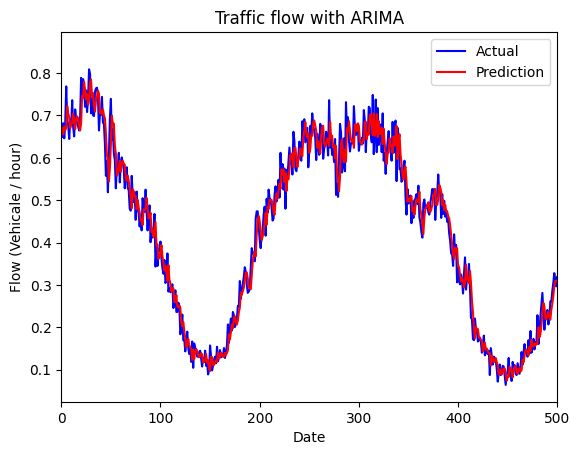

In [10]:


history = xtrain.tolist()
predictions = list()
r2 = list()
rmse = list()
for t in range(500):
    model = ARIMA(history, order=(5,1,0), seasonal_order=(1,0,1,12))
    #model = ExponentialSmoothing(history)
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = xtest[t]
    history.append(obs)
    plt.plot(xtest,color = 'blue',label = "Actual")
    plt.plot(predictions, color='red', label = "Prediction")
    plt.xlabel('Date')
    plt.ylabel("Flow (Vehicale / hour)")
    plt.title('Traffic flow with ARIMA')
    plt.xlim(0,len(predictions))
    plt.legend()
    plt.show()
    clear_output(wait=True)




In [11]:
def plt_functions(check):
    if check == 'Speed':
        plt.figure(figsize=(10,5))
        plt.plot(xtest,label = "Test")
        plt.plot(predictions, label = "Prediction")
        plt.ylabel("Speed (Vehicale / hour)")
        plt.title('Traffic Speed with ARIMA')
        plt.xlim(10,100)
        plt.legend()
        plt.show()
    elif check == 'Flow':
        plt.figure(figsize=(10,5))
        plt.plot(xtest,label = "Test")
        plt.plot(predictions, label = "Prediction")
        plt.ylabel("Flow (Vehicale / hour)")
        plt.title('Traffic Flow with ARIMA')
        plt.xlim(10,100)
        plt.legend()
        plt.show()
    elif check == 'Occupy':
        plt.figure(figsize=(10,5))
        plt.plot(xtest,label = "Test")
        plt.plot(predictions, label = "Prediction")
        plt.ylabel("Occupy (Vehicale / hour)")
        plt.title('Traffic Occupy with ARIMA')
        plt.xlim(10,100)
        plt.legend()
        plt.show()

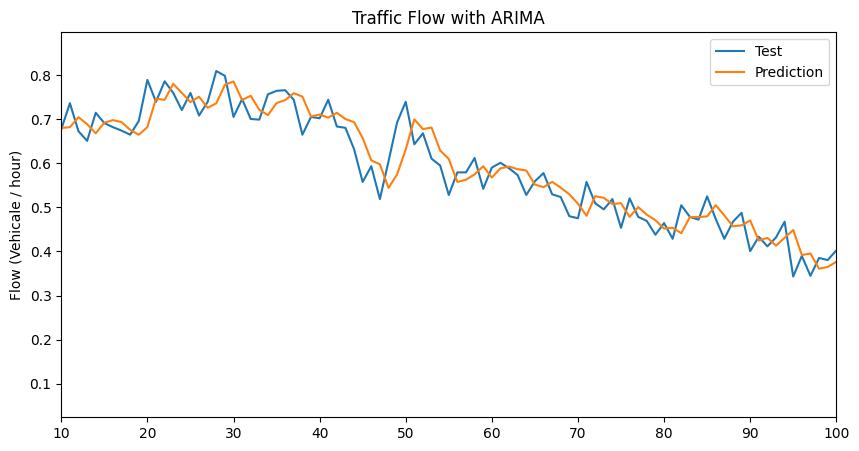

In [12]:
plt_functions("Flow")

In [13]:
rmse = sqrt(mean_squared_error(xtest[:len(predictions)], predictions))
mae = mean_absolute_error(xtest[:len(predictions)], predictions)
mse = mean_squared_error(xtest[:len(predictions)],predictions)

In [14]:
print(rmse)
print(mae)
print(mse)

0.039657889374554514
0.030617208185064148
0.001572748189644404


rmse = 0.01485145174357371
mae = 0.011815022766354391
mse = 0.00022056561889169856

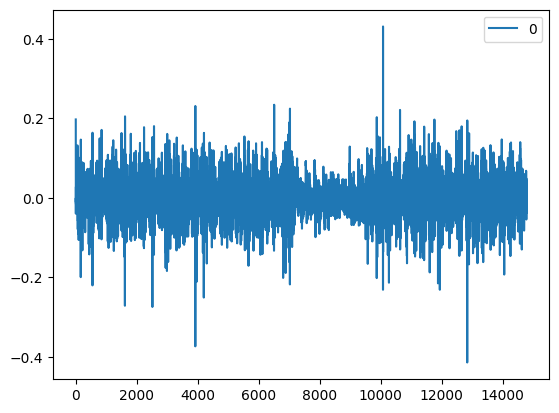

In [15]:
residuals = DataFrame(model_fit.resid) 
residuals.plot()
plt.show()

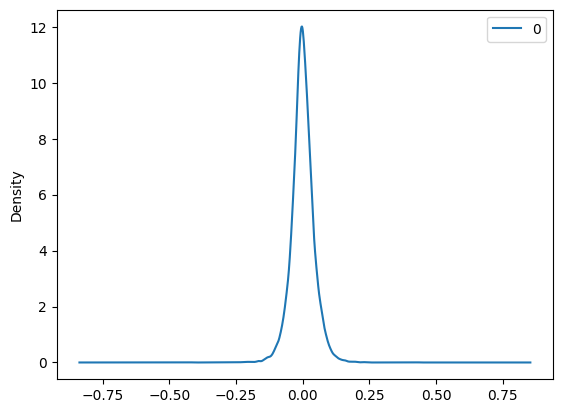

In [16]:
#we continue to check residuals
residuals.plot(kind='kde') 
plt.show()

In [17]:
r2_score(xtest[:len(predictions)],predictions)

0.9646026645692938